In [39]:
pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
import pandas as pd
import re

import matplotlib.pyplot as plt
import seaborn as sns

#Processamento de Linguagem Natural
import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [41]:
dataframe_sentimento = pd.read_csv("dataframe_final_candidatos_pronto_para_sentimento.csv")

In [42]:
dataframe_sentimento.head()

,Data_Hora,IdTweet,Tweet,Candidato,Tweet_limpo
0,2022-07-30 23:16:51+00:00,1553520025637625856,"@LulaOficial Exatamente, a verdade contra a su...",Lula,"exatamente, a verdade contra a sua mentira. 😡😡😡😡"
1,2022-07-30 23:16:51+00:00,1553520024891047943,@gleisi @LulaOficial @CamiloSantanaCE @elmanof...,Lula,só rindo hahahahaha
2,2022-07-30 23:16:49+00:00,1553520017127374848,"O Manifesto do Direito via USP, com 500 mil as...",Lula,"o manifesto do direito via usp, com 500 mil as..."
3,2022-07-30 23:16:49+00:00,1553520014518620162,@DeputadoFederal @LulaOficial 22🇧🇷🇧🇷🇧🇷🇧🇷🇧🇷🇧🇷,Lula,22🇧🇷🇧🇷🇧🇷🇧🇷🇧🇷🇧🇷
4,2022-07-30 23:16:49+00:00,1553520014342381569,"@LulaOficial Analisando, o molusco não sai as ...",Lula,"analisando, o molusco não sai as ruas, bolson..."


In [43]:
analisador_de_texto = SentimentIntensityAnalyzer()

In [44]:
dataframe_sentimento['Sentimentos'] = dataframe_sentimento['Tweet_limpo'].apply(lambda i: analisador_de_texto.polarity_scores(' '.join(re.findall(r'\w+', i.lower()))))

In [45]:
dataframe_sentimento.tail()

,Data_Hora,IdTweet,Tweet,Candidato,Tweet_limpo,Sentimentos
148,2022-07-30 23:10:58+00:00,1553518544670842880,@EngZini @cirogomes @EngZini Deputado estadual...,Ciro Gomes,deputado estadual n° 12120,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
149,2022-07-30 23:10:56+00:00,1553518534172483584,"@cirogomes ""Há 500 anos, direto do túnel do te...",Ciro Gomes,"""há 500 anos, direto do túnel do tempo"". vale...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
150,2022-07-30 23:10:54+00:00,1553518527969116164,"@cirogomes Parabéns mas, quando vc vai pra Fra...",Ciro Gomes,"parabéns mas, quando vc vai pra frança? fia.0...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
151,2022-07-30 23:10:52+00:00,1553518518158737408,Será que o povo mais esclarecido tanto do lado...,Ciro Gomes,será que o povo mais esclarecido tanto do lado...,"{'neg': 0.0, 'neu': 0.891, 'pos': 0.109, 'comp..."
152,2022-07-30 23:10:46+00:00,1553518495064801281,@randolfeap É por isso que sou Ciro Gomes!!! 🌹,Ciro Gomes,é por isso que sou ciro gomes!!! 🌹,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [46]:
dataframe_sentimento['Sentimentos']

0      {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1      {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2      {'neg': 0.081, 'neu': 0.919, 'pos': 0.0, 'comp...
3      {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
4      {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
                             ...                        
148    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
149    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
150    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
151    {'neg': 0.0, 'neu': 0.891, 'pos': 0.109, 'comp...
152    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: Sentimentos, Length: 153, dtype: object

In [47]:
dataframe_sentimento['Positivo'] = dataframe_sentimento['Sentimentos'].apply(lambda i:i['pos'])
dataframe_sentimento['Negativo'] = dataframe_sentimento['Sentimentos'].apply(lambda i:i['neg'])
dataframe_sentimento['Neutro'] = dataframe_sentimento['Sentimentos'].apply(lambda i:i['neu'])
dataframe_sentimento['Composicao'] = dataframe_sentimento['Sentimentos'].apply(lambda i:i['compound'])

In [48]:
dataframe_sentimento.head()

,Data_Hora,IdTweet,Tweet,Candidato,Tweet_limpo,Sentimentos,Positivo,Negativo,Neutro,Composicao
0,2022-07-30 23:16:51+00:00,1553520025637625856,"@LulaOficial Exatamente, a verdade contra a su...",Lula,"exatamente, a verdade contra a sua mentira. 😡😡😡😡","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.000,1.000,0.0000
1,2022-07-30 23:16:51+00:00,1553520024891047943,@gleisi @LulaOficial @CamiloSantanaCE @elmanof...,Lula,só rindo hahahahaha,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.000,1.000,0.0000
2,2022-07-30 23:16:49+00:00,1553520017127374848,"O Manifesto do Direito via USP, com 500 mil as...",Lula,"o manifesto do direito via usp, com 500 mil as...","{'neg': 0.081, 'neu': 0.919, 'pos': 0.0, 'comp...",0.0,0.081,0.919,-0.5267
3,2022-07-30 23:16:49+00:00,1553520014518620162,@DeputadoFederal @LulaOficial 22🇧🇷🇧🇷🇧🇷🇧🇷🇧🇷🇧🇷,Lula,22🇧🇷🇧🇷🇧🇷🇧🇷🇧🇷🇧🇷,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.000,1.000,0.0000
4,2022-07-30 23:16:49+00:00,1553520014342381569,"@LulaOficial Analisando, o molusco não sai as ...",Lula,"analisando, o molusco não sai as ruas, bolson...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.000,1.000,0.0000


In [49]:
sentimento = []

In [50]:
for i in dataframe_sentimento['Composicao']:
  if i >= 0.05:
    sentimento.append('Positivo')
  elif i <= (-0.05):
    sentimento.append('Negativo')
  else:
    sentimento.append('Neutro')
  

In [51]:
sentimento

['Neutro',
 'Neutro',
 'Negativo',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Negativo',
 'Neutro',
 'Negativo',
 'Neutro',
 'Negativo',
 'Neutro',
 'Negativo',
 'Neutro',
 'Negativo',
 'Neutro',
 'Neutro',
 'Neutro',
 'Negativo',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Negativo',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Negativo',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Negativo',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Negativo',
 'Neutro',
 'Negativo',
 'Negativo',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Negativo',
 'Neutro',
 'Neutro',
 'Neutro',
 'Negativo',
 'Neutro',
 'Negativo',
 'Negativo',
 'Negativo',
 'Neutro',
 'Neutro',
 'Negativo',
 'Neutro',
 'Negativo',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Negativo',
 'Neutro',
 'Neutro',
 'Negativo',
 'Neutro',
 'Neutro',

In [52]:
dataframe_sentimento['Sentimento_Final'] = sentimento

In [53]:
dataframe_sentimento.head()

,Data_Hora,IdTweet,Tweet,Candidato,Tweet_limpo,Sentimentos,Positivo,Negativo,Neutro,Composicao,Sentimento_Final
0,2022-07-30 23:16:51+00:00,1553520025637625856,"@LulaOficial Exatamente, a verdade contra a su...",Lula,"exatamente, a verdade contra a sua mentira. 😡😡😡😡","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.000,1.000,0.0000,Neutro
1,2022-07-30 23:16:51+00:00,1553520024891047943,@gleisi @LulaOficial @CamiloSantanaCE @elmanof...,Lula,só rindo hahahahaha,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.000,1.000,0.0000,Neutro
2,2022-07-30 23:16:49+00:00,1553520017127374848,"O Manifesto do Direito via USP, com 500 mil as...",Lula,"o manifesto do direito via usp, com 500 mil as...","{'neg': 0.081, 'neu': 0.919, 'pos': 0.0, 'comp...",0.0,0.081,0.919,-0.5267,Negativo
3,2022-07-30 23:16:49+00:00,1553520014518620162,@DeputadoFederal @LulaOficial 22🇧🇷🇧🇷🇧🇷🇧🇷🇧🇷🇧🇷,Lula,22🇧🇷🇧🇷🇧🇷🇧🇷🇧🇷🇧🇷,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.000,1.000,0.0000,Neutro
4,2022-07-30 23:16:49+00:00,1553520014342381569,"@LulaOficial Analisando, o molusco não sai as ...",Lula,"analisando, o molusco não sai as ruas, bolson...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.000,1.000,0.0000,Neutro


In [54]:
dataframe_sentimento['Sentimento_Final'].value_counts()

Neutro      118
Negativo     32
Positivo      3
Name: Sentimento_Final, dtype: int64

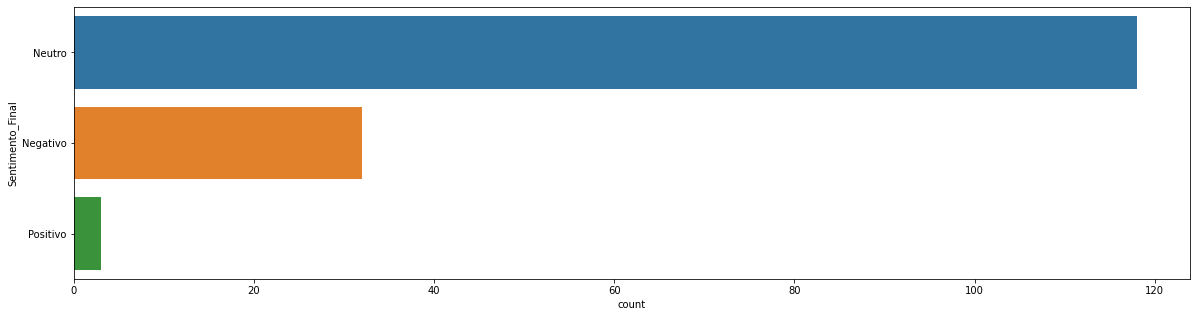

In [55]:
plt.figure(figsize=(20, 5))
sns.countplot(y="Sentimento_Final", data=dataframe_sentimento)

### Lula

In [56]:
resultado_filtro_lula = dataframe_sentimento[dataframe_sentimento['Candidato'] == "Lula"] 

In [57]:
resultado_filtro_lula.head()

,Data_Hora,IdTweet,Tweet,Candidato,Tweet_limpo,Sentimentos,Positivo,Negativo,Neutro,Composicao,Sentimento_Final
0,2022-07-30 23:16:51+00:00,1553520025637625856,"@LulaOficial Exatamente, a verdade contra a su...",Lula,"exatamente, a verdade contra a sua mentira. 😡😡😡😡","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.000,1.000,0.0000,Neutro
1,2022-07-30 23:16:51+00:00,1553520024891047943,@gleisi @LulaOficial @CamiloSantanaCE @elmanof...,Lula,só rindo hahahahaha,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.000,1.000,0.0000,Neutro
2,2022-07-30 23:16:49+00:00,1553520017127374848,"O Manifesto do Direito via USP, com 500 mil as...",Lula,"o manifesto do direito via usp, com 500 mil as...","{'neg': 0.081, 'neu': 0.919, 'pos': 0.0, 'comp...",0.0,0.081,0.919,-0.5267,Negativo
3,2022-07-30 23:16:49+00:00,1553520014518620162,@DeputadoFederal @LulaOficial 22🇧🇷🇧🇷🇧🇷🇧🇷🇧🇷🇧🇷,Lula,22🇧🇷🇧🇷🇧🇷🇧🇷🇧🇷🇧🇷,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.000,1.000,0.0000,Neutro
4,2022-07-30 23:16:49+00:00,1553520014342381569,"@LulaOficial Analisando, o molusco não sai as ...",Lula,"analisando, o molusco não sai as ruas, bolson...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.000,1.000,0.0000,Neutro


In [58]:
resultado_filtro_lula['Candidato'].unique()

array(['Lula'], dtype=object)

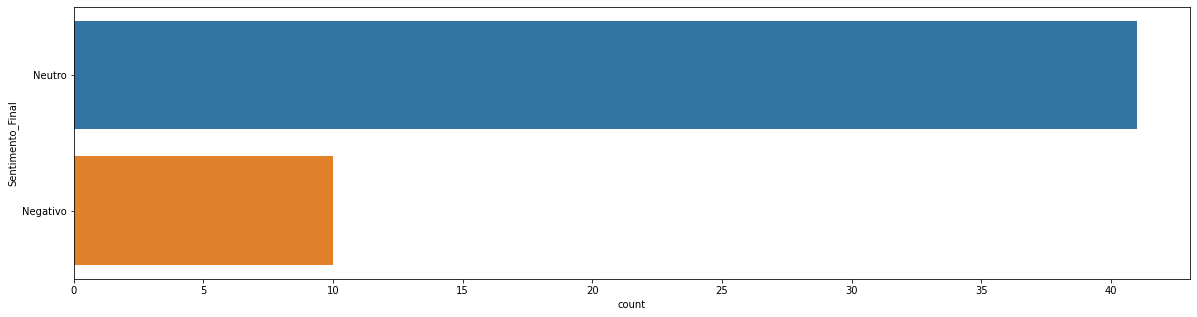

In [59]:
plt.figure(figsize=(20, 5))
sns.countplot(y="Sentimento_Final", data=resultado_filtro_lula)

In [61]:
dataframe_sentimento.head()

,Data_Hora,IdTweet,Tweet,Candidato,Tweet_limpo,Sentimentos,Positivo,Negativo,Neutro,Composicao,Sentimento_Final
0,2022-07-30 23:16:51+00:00,1553520025637625856,"@LulaOficial Exatamente, a verdade contra a su...",Lula,"exatamente, a verdade contra a sua mentira. 😡😡😡😡","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.000,1.000,0.0000,Neutro
1,2022-07-30 23:16:51+00:00,1553520024891047943,@gleisi @LulaOficial @CamiloSantanaCE @elmanof...,Lula,só rindo hahahahaha,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.000,1.000,0.0000,Neutro
2,2022-07-30 23:16:49+00:00,1553520017127374848,"O Manifesto do Direito via USP, com 500 mil as...",Lula,"o manifesto do direito via usp, com 500 mil as...","{'neg': 0.081, 'neu': 0.919, 'pos': 0.0, 'comp...",0.0,0.081,0.919,-0.5267,Negativo
3,2022-07-30 23:16:49+00:00,1553520014518620162,@DeputadoFederal @LulaOficial 22🇧🇷🇧🇷🇧🇷🇧🇷🇧🇷🇧🇷,Lula,22🇧🇷🇧🇷🇧🇷🇧🇷🇧🇷🇧🇷,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.000,1.000,0.0000,Neutro
4,2022-07-30 23:16:49+00:00,1553520014342381569,"@LulaOficial Analisando, o molusco não sai as ...",Lula,"analisando, o molusco não sai as ruas, bolson...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.000,1.000,0.0000,Neutro


In [62]:
dataframe_final = dataframe_sentimento[["Data_Hora", "IdTweet", "Tweet", "Candidato", "Tweet_limpo", "Sentimento_Final"]]

In [63]:
dataframe_final.head()

,Data_Hora,IdTweet,Tweet,Candidato,Tweet_limpo,Sentimento_Final
0,2022-07-30 23:16:51+00:00,1553520025637625856,"@LulaOficial Exatamente, a verdade contra a su...",Lula,"exatamente, a verdade contra a sua mentira. 😡😡😡😡",Neutro
1,2022-07-30 23:16:51+00:00,1553520024891047943,@gleisi @LulaOficial @CamiloSantanaCE @elmanof...,Lula,só rindo hahahahaha,Neutro
2,2022-07-30 23:16:49+00:00,1553520017127374848,"O Manifesto do Direito via USP, com 500 mil as...",Lula,"o manifesto do direito via usp, com 500 mil as...",Negativo
3,2022-07-30 23:16:49+00:00,1553520014518620162,@DeputadoFederal @LulaOficial 22🇧🇷🇧🇷🇧🇷🇧🇷🇧🇷🇧🇷,Lula,22🇧🇷🇧🇷🇧🇷🇧🇷🇧🇷🇧🇷,Neutro
4,2022-07-30 23:16:49+00:00,1553520014342381569,"@LulaOficial Analisando, o molusco não sai as ...",Lula,"analisando, o molusco não sai as ruas, bolson...",Neutro


In [64]:
dataframe_final.to_csv('dataframe_final.csv', sep=',', index=False)